# Employee preformance prediction

### Importing Libraries

We start by importing the necessary libraries for data manipulation, visualization, and machine learning. These include `pandas` for data handling, `numpy` for numerical operations, `matplotlib` and `seaborn` for plotting, `bokeh` and `plotly` for interactive visualizations, and `scikit-learn` for machine learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import bokeh.plotting as bkp
import plotly.express as px
import plotly.graph_objects as gon
from bokeh.palettes import Category10
from bokeh.transform import factor_cmap
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
from sklearn.decomposition import PCA
import joypy as joy

ModuleNotFoundError: No module named 'pandas'

### Loading Data
We load the employee attrition dataset from a CSV file named `WA_Fn-UseC_-HR-Employee-Attrition.csv` into a pandas DataFrame.

In [ ]:
# load data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Data Inspection
We inspect the first few rows of the dataset using `df.head()` to understand its structure and the types of data it contains. We also check the data types of each column using `df.dtypes`.


In [ ]:
# check the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# check the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
# check the shape of the data
df.shape

(1470, 35)

In [ ]:
# check the columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AttritionBinary'],
      dtype='object')

In [ ]:
# check the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# check the unique values in the data
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## data visualization
We create various visualizations to explore the data:
1. **Plotly Express 3D Visualization**: A histogram showing the distribution of attrition with animation by department.
2. **Plotly Interactive 3D Scatter Plot**: An interactive 3D scatter plot of employee attributes colored by attrition and symbolized by department.
3. **Matplotlib Animation**: An animated bar chart showing the distribution of attrition across departments over time.
4. **Rotating 3D Scatter Plot**: A 3D scatter plot of employee attributes with an animation that rotates the plot.

In [ ]:
from bokeh.models import ColumnDataSource

# 1. Plotly Express 3D visualization
fig = px.histogram(df, x='Attrition', color='Attrition',
                   title='Distribution of Attrition',
                   animation_frame='Department',
                   color_discrete_sequence=['#636EFA', '#EF553B'])
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
# 2. Plotly Interactive 3D Scatter Plot
fig = px.scatter_3d(df, x='Age', y='MonthlyIncome', z='YearsAtCompany',
                    color='Attrition', symbol='Department',
                    title='3D Scatter Plot of Employee Attributes',
                    labels={'Age': 'Age', 'MonthlyIncome': 'Monthly Income', 'YearsAtCompany': 'Years at Company'},
                    color_discrete_map={'Yes': 'red', 'No': 'blue'})
fig.update_layout(scene=dict(
    xaxis_title='Age',
    yaxis_title='Monthly Income',
    zaxis_title='Years at Company'))
fig.show()

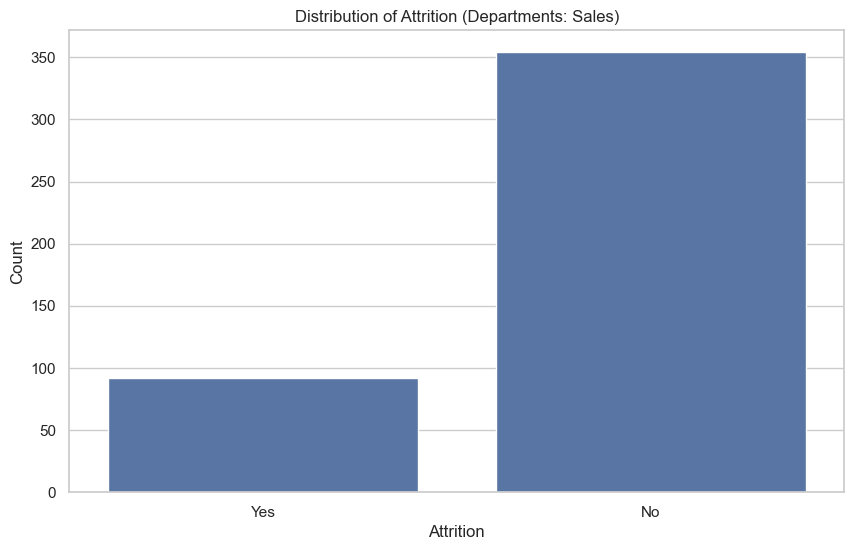

In [ ]:
# 3. Matplotlib animation - animated bar chart
fig, ax = plt.subplots(figsize=(10, 6))

def animate(i):
    ax.clear()
    departments = df['Department'].unique()[:i+1]
    data = df[df['Department'].isin(departments)]
    sns.countplot(x='Attrition', data=data, ax=ax)
    ax.set_title(f'Distribution of Attrition (Departments: {", ".join(departments)})')
    ax.set_xlabel('Attrition')
    ax.set_ylabel('Count')

ani = FuncAnimation(fig, animate, frames=len(df['Department'].unique()), interval=1000, repeat=True)
HTML(ani.to_jshtml())

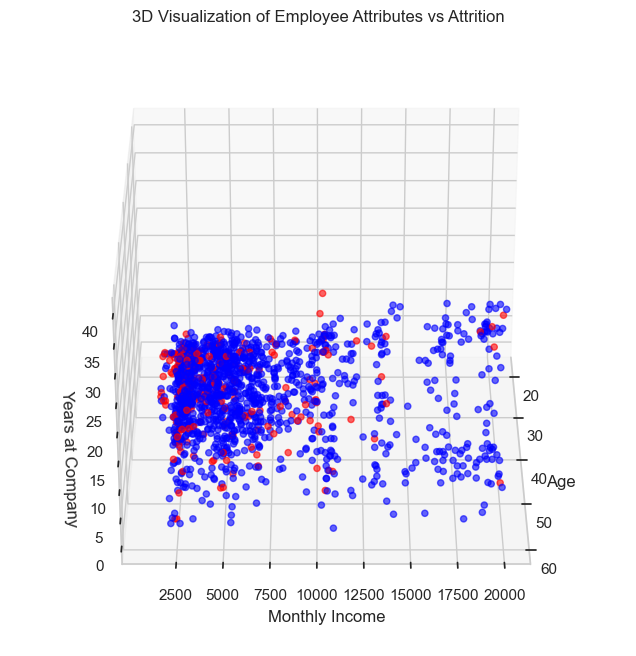

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# 4. 3D Scatter plot with matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Encode attrition as numeric
attrition_encode = {'Yes': 1, 'No': 0}
colors = ['red' if a == 'Yes' else 'blue' for a in df['Attrition']]

ax.scatter(df['Age'], df['MonthlyIncome'], df['YearsAtCompany'], c=colors, alpha=0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Years at Company')
ax.set_title('3D Visualization of Employee Attributes vs Attrition')

# Rotate the plot
for angle in range(0, 360, 10):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(0.1)

plt.show()

Few other types of vistualization for better understanding of the data.

In [ ]:
# convert attrition to binary
df['AttritionBinary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

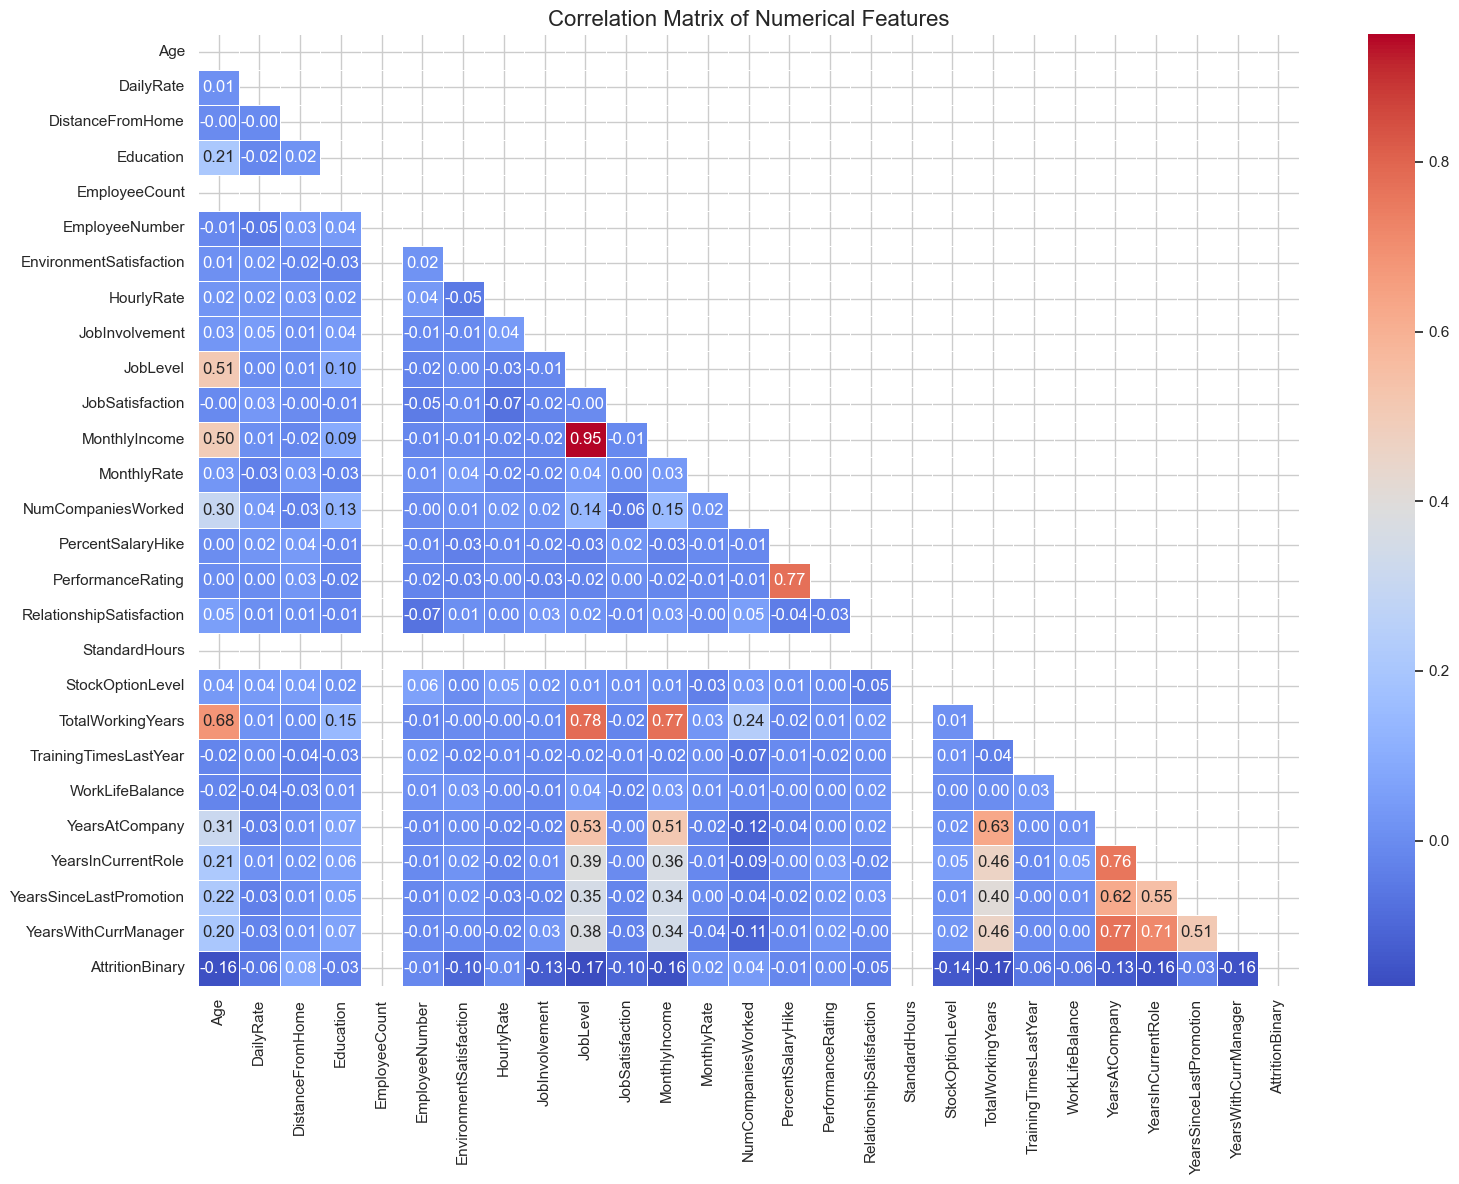

In [ ]:
# 1. Correlation heatmap for numerical features
plt.figure(figsize=(16, 12))
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

In [ ]:
# 2. Attrition by Department using Plotly
fig = px.histogram(df, x='Department', color='Attrition',
                  title='Attrition by Department',
                  barmode='group',
                  color_discrete_map={'Yes': 'red', 'No': 'blue'})
fig.update_layout(xaxis_title='Department', yaxis_title='Count')
fig.write_html('attrition_by_department.html')

In [ ]:
# 3. Attrition by Job Role using Plotly
fig = px.histogram(df, x='JobRole', color='Attrition',
                  title='Attrition by Job Role',
                  barmode='group',
                  color_discrete_map={'Yes': 'red', 'No': 'blue'})
fig.update_layout(xaxis_title='Job Role', yaxis_title='Count')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.write_html('attrition_by_jobrole.html')

In [ ]:
# 4. Interactive 3D Scatter Plot with PCA components using Plotly
# Perform PCA on numerical features
pca = PCA(n_components=3)
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df = numerical_df.drop(['EmployeeNumber', 'AttritionBinary'], axis=1, errors='ignore')
pca_result = pca.fit_transform(numerical_df.fillna(numerical_df.mean()))

# Create a 3D scatter plot
fig = px.scatter_3d(x=pca_result[:, 0], y=pca_result[:, 1], z=pca_result[:, 2],
                   color=df['Attrition'],
                   hover_data=[df['Department'], df['JobRole'], df['Age']],
                   title='3D PCA Visualization of HR Data',
                   labels={'color': 'Attrition'},
                   color_discrete_map={'Yes': 'red', 'No': 'blue'})
fig.update_layout(scene = dict(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    zaxis_title='PCA Component 3'))
fig.write_html('3d_pca_visualization.html')

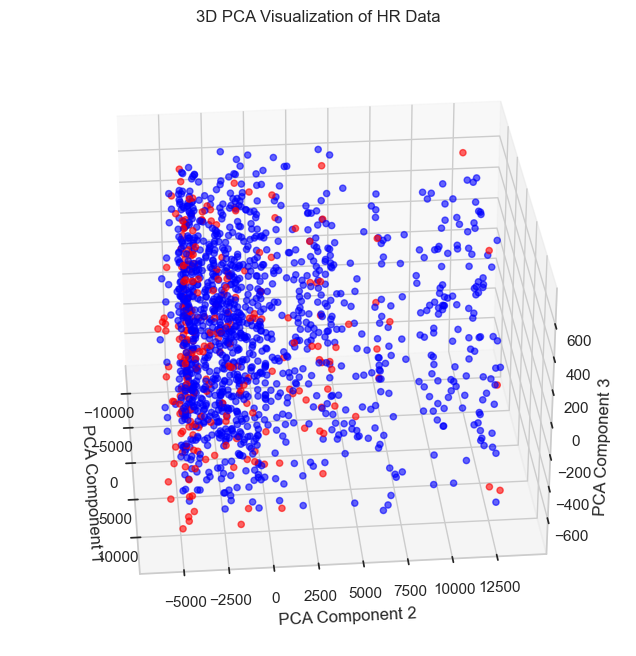

In [ ]:
# 5. Animated 3D Scatter Plot with Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color map for attrition
colors = np.where(df['AttritionBinary'] == 1, 'red', 'blue')

# Create scatter plot
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=colors, alpha=0.6)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Visualization of HR Data')

# Function to update plot for animation
def update(angle):
    ax.view_init(30, angle)
    return scatter,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=100, blit=True)
ani.save('3d_pca_animation.gif', writer='pillow', fps=20)

In [ ]:
# 6. Bokeh Interactive Plot for Age vs Years at Company
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

# Create ColumnDataSource
source = ColumnDataSource(data=dict(
    age=df['Age'],
    years=df['YearsAtCompany'],
    attrition=df['Attrition'],
    department=df['Department'],
    jobrole=df['JobRole'],
    performance=df['PerformanceRating']
))

# Create figure
p = figure(title='Age vs Years at Company by Attrition',
           x_axis_label='Age',
           y_axis_label='Years at Company',
           width=800, height=600)

# Add hover tool
hover = HoverTool(tooltips=[
    ('Age', '@age'),
    ('Years at Company', '@years'),
    ('Attrition', '@attrition'),
    ('Department', '@department'),
    ('Job Role', '@jobrole'),
    ('Performance', '@performance')
])
p.add_tools(hover)

# Plot points
p.circle('age', 'years', size=10, color='blue', alpha=0.5, legend_label='No Attrition',
         source=ColumnDataSource(df[df['Attrition'] == 'No']))
p.circle('age', 'years', size=10, color='red', alpha=0.5, legend_label='Attrition',
         source=ColumnDataSource(df[df['Attrition'] == 'Yes']))

# Show legend
p.legend.location = "top_right"
p.legend.click_policy = "hide"

# Save plot
output_file('age_vs_years_bokeh.html')

C:\Users\rohithgg\AppData\Local\Temp\ipykernel_17936\3696676593.py:34: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

C:\Users\rohithgg\AppData\Local\Temp\ipykernel_17936\3696676593.py:36: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



In [ ]:
# 7. Visualize Job Satisfaction vs Performance Rating
fig = px.scatter(df, x='JobSatisfaction', y='PerformanceRating',
                color='Attrition', size='YearsAtCompany',
                hover_data=['Department', 'JobRole', 'Age'],
                title='Job Satisfaction vs Performance Rating',
                color_discrete_map={'Yes': 'red', 'No': 'blue'})
fig.update_layout(xaxis_title='Job Satisfaction', yaxis_title='Performance Rating')
fig.write_html('satisfaction_vs_performance.html')

# 8. Monthly Income vs. Performance Rating
fig = px.box(df, x='PerformanceRating', y='MonthlyIncome', color='Attrition',
            title='Monthly Income vs Performance Rating',
            color_discrete_map={'Yes': 'red', 'No': 'blue'})
fig.update_layout(xaxis_title='Performance Rating', yaxis_title='Monthly Income')
fig.write_html('income_vs_performance.html')

print("Data visualization completed successfully!")

Data visualization completed successfully!


## model analysis and prediction
### test few models and finalization


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define features and targets
# For employee performance prediction
performance_target = 'PerformanceRating'
# For employee attrition prediction
attrition_target = 'AttritionBinary'

In [ ]:
# Drop any unnecessary columns and Employee Number (ID column)
X = df.drop(['Attrition', attrition_target, performance_target, 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
y_performance = df[performance_target]
y_attrition = df[attrition_target]

In [ ]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Print features being used
print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

Numeric features: 22
Categorical features: 7


In [ ]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_attrition_train, y_attrition_test, y_performance_train, y_performance_test = train_test_split(
    X, y_attrition, y_performance, test_size=0.2, random_state=42)

### attrition prediction
We use machine learning models to predict the probability of employee attrition. The `predict_employee_outcomes()` function takes employee data and returns predictions for attrition risk and performance ratings.


In [ ]:
# Create dictionary to store classification model results
classification_results = {}

Accuracy: 0.8776
Precision: 0.7143
Recall: 0.1282
F1 Score: 0.2174


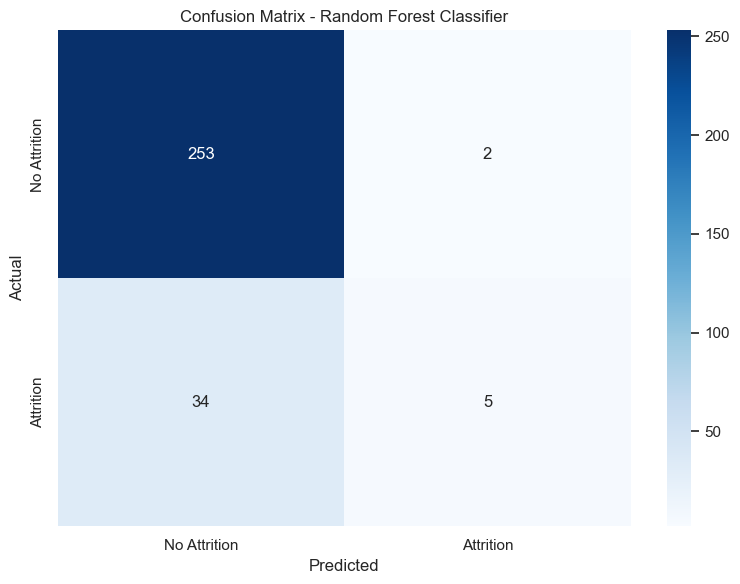

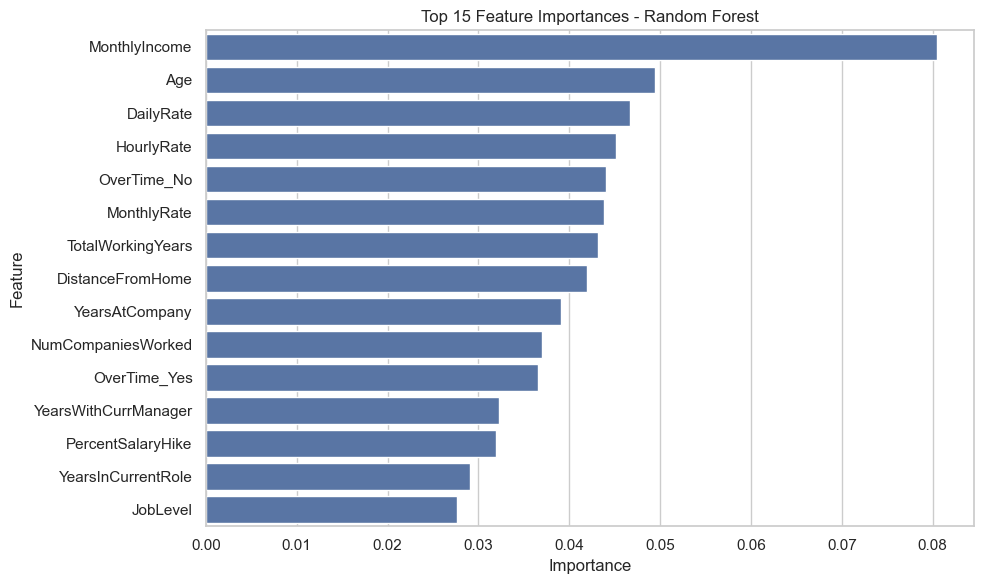

In [ ]:
# Model 1: Random Forest Classifier
print("\n===== Gradient Boosting Classifier =====")
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_clf.fit(X_train, y_attrition_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_attrition_test, y_pred_rf)
precision_rf = precision_score(y_attrition_test, y_pred_rf)
recall_rf = recall_score(y_attrition_test, y_pred_rf)
f1_rf = f1_score(y_attrition_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Store results
classification_results['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}

# Plot confusion matrix
cm_rf = confusion_matrix(y_attrition_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('rf_conf_matrix.png')

# Feature importance for Random Forest
feature_names = numeric_features + list(rf_clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
rf_importances = rf_clf.named_steps['classifier'].feature_importances_
rf_feature_imp = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_imp = rf_feature_imp.sort_values('Importance', ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_imp)
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')

In [ ]:
# Model 2: Gradient Boosting Classifier
print("\n===== Gradient Boosting Classifier =====")
gb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
gb_clf.fit(X_train, y_attrition_train)
y_pred_gb = gb_clf.predict(X_test)

# Evaluate Gradient Boosting
accuracy_gb = accuracy_score(y_attrition_test, y_pred_gb)
precision_gb = precision_score(y_attrition_test, y_pred_gb)
recall_gb = recall_score(y_attrition_test, y_pred_gb)
f1_gb = f1_score(y_attrition_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")

# Store results
classification_results['Gradient Boosting'] = {
    'Accuracy': accuracy_gb,
    'Precision': precision_gb,
    'Recall': recall_gb,
    'F1 Score': f1_gb
}


===== Gradient Boosting Classifier =====
Accuracy: 0.8776
Precision: 0.6000
Recall: 0.2308
F1 Score: 0.3333


In [ ]:
# Model 3: Logistic Regression
print("\n===== Logistic Regression =====")
lr_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
lr_clf.fit(X_train, y_attrition_train)
y_pred_lr = lr_clf.predict(X_test)

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_attrition_test, y_pred_lr)
precision_lr = precision_score(y_attrition_test, y_pred_lr)
recall_lr = recall_score(y_attrition_test, y_pred_lr)
f1_lr = f1_score(y_attrition_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Store results
classification_results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr
}


===== Logistic Regression =====
Accuracy: 0.8946
Precision: 0.6333
Recall: 0.4872
F1 Score: 0.5507



===== XGBoost Classifier =====
Accuracy: 0.8741
Precision: 0.5500
Recall: 0.2821
F1 Score: 0.3729

===== Classification Model Comparison =====
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.877551   0.714286  0.128205  0.217391
Gradient Boosting    0.877551   0.600000  0.230769  0.333333
Logistic Regression  0.894558   0.633333  0.487179  0.550725
XGBoost              0.874150   0.550000  0.282051  0.372881


<Figure size 1200x600 with 0 Axes>

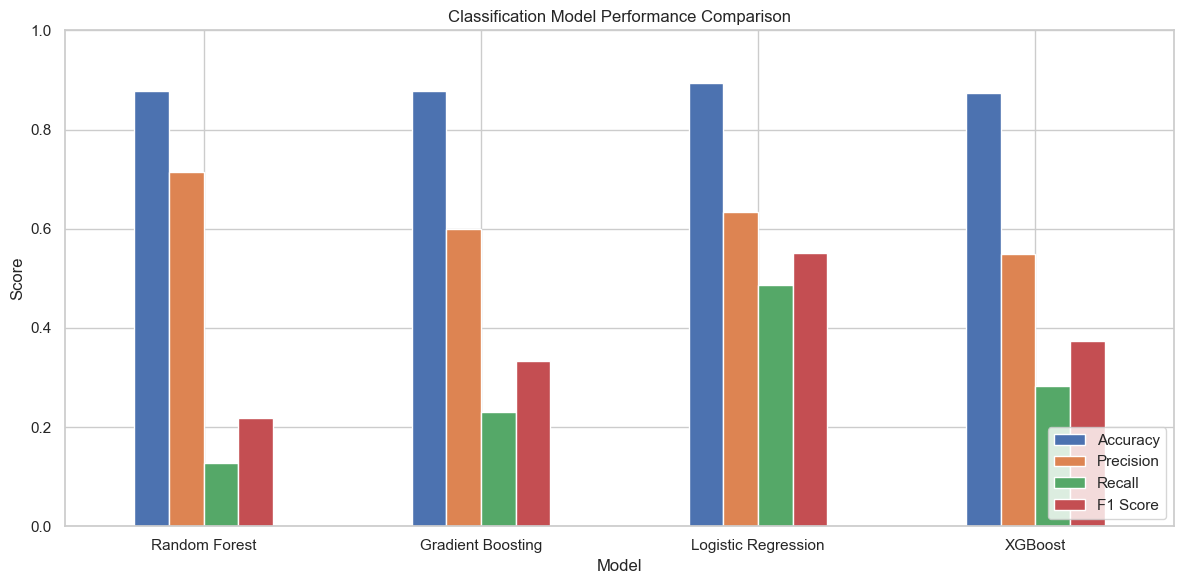

In [ ]:
# Model 4: XGBoost Classifier
print("\n===== XGBoost Classifier =====")
xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])
xgb_clf.fit(X_train, y_attrition_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_attrition_test, y_pred_xgb)
precision_xgb = precision_score(y_attrition_test, y_pred_xgb)
recall_xgb = recall_score(y_attrition_test, y_pred_xgb)
f1_xgb = f1_score(y_attrition_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")

# Store results
classification_results['XGBoost'] = {
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb
}

# Compare classification models
clf_results_df = pd.DataFrame(classification_results).T
print("\n===== Classification Model Comparison =====")
print(clf_results_df)

# Create comparison plot
plt.figure(figsize=(12, 6))
clf_results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Classification Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('classification_comparison.png')

In [ ]:
# Create an interactive plot using Plotly
fig = go.Figure()

for metric in clf_results_df.columns:
    fig.add_trace(go.Bar(
        x=clf_results_df.index,
        y=clf_results_df[metric],
        name=metric
    ))

fig.update_layout(
    title='Classification Model Performance Comparison',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group',
    yaxis=dict(range=[0, 1])
)
fig.write_html('classification_comparison.html')

### performace prediction

In [ ]:
# Create dictionary to store regression model results
regression_results = {}

In [ ]:
# Model 1: Random Forest Regressor
print("\n===== Random Forest Regressor =====")
rf_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_reg.fit(X_train, y_performance_train)
y_pred_rf_reg = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
rmse_rf = np.sqrt(mean_squared_error(y_performance_test, y_pred_rf_reg))
mae_rf = mean_absolute_error(y_performance_test, y_pred_rf_reg)
r2_rf = r2_score(y_performance_test, y_pred_rf_reg)

print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Store results
regression_results['Random Forest'] = {
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'R² Score': r2_rf
}


===== Random Forest Regressor =====
RMSE: 0.0000
MAE: 0.0000
R² Score: 1.0000


In [ ]:
# Model 2: Gradient Boosting Regressor
print("\n===== Gradient Boosting Regressor =====")
gb_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
gb_reg.fit(X_train, y_performance_train)
y_pred_gb_reg = gb_reg.predict(X_test)

# Evaluate Gradient Boosting Regressor
rmse_gb = np.sqrt(mean_squared_error(y_performance_test, y_pred_gb_reg))
mae_gb = mean_absolute_error(y_performance_test, y_pred_gb_reg)
r2_gb = r2_score(y_performance_test, y_pred_gb_reg)

print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

# Store results
regression_results['Gradient Boosting'] = {
    'RMSE': rmse_gb,
    'MAE': mae_gb,
    'R² Score': r2_gb
}


===== Gradient Boosting Regressor =====
RMSE: 0.0000
MAE: 0.0000
R² Score: 1.0000


In [ ]:
# Model 3: Linear Regression
print("\n===== Linear Regression =====")
lr_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_reg.fit(X_train, y_performance_train)
y_pred_lr_reg = lr_reg.predict(X_test)

# Evaluate Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_performance_test, y_pred_lr_reg))
mae_lr = mean_absolute_error(y_performance_test, y_pred_lr_reg)
r2_lr = r2_score(y_performance_test, y_pred_lr_reg)

print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

# Store results
regression_results['Linear Regression'] = {
    'RMSE': rmse_lr,
    'MAE': mae_lr,
    'R² Score': r2_lr
}


===== Linear Regression =====
RMSE: 0.2195
MAE: 0.1748
R² Score: 0.6141


In [ ]:
# Model 4: XGBoost Regressor
print("\n===== XGBoost Regressor =====")
xgb_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])
xgb_reg.fit(X_train, y_performance_train)
y_pred_xgb_reg = xgb_reg.predict(X_test)

# Evaluate XGBoost Regressor
rmse_xgb = np.sqrt(mean_squared_error(y_performance_test, y_pred_xgb_reg))
mae_xgb = mean_absolute_error(y_performance_test, y_pred_xgb_reg)
r2_xgb = r2_score(y_performance_test, y_pred_xgb_reg)

print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

# Store results
regression_results['XGBoost'] = {
    'RMSE': rmse_xgb,
    'MAE': mae_xgb,
    'R² Score': r2_xgb
}


===== XGBoost Regressor =====
RMSE: 0.0000
MAE: 0.0000
R² Score: 1.0000


In [ ]:
# Compare regression models
reg_results_df = pd.DataFrame(regression_results).T
print("\n===== Regression Model Comparison =====")
print(reg_results_df)


===== Regression Model Comparison =====
                       RMSE       MAE  R² Score
Random Forest      0.000000  0.000000  1.000000
Gradient Boosting  0.000009  0.000007  1.000000
Linear Regression  0.219526  0.174833  0.614055
XGBoost            0.000025  0.000018  1.000000


<Figure size 1200x600 with 0 Axes>

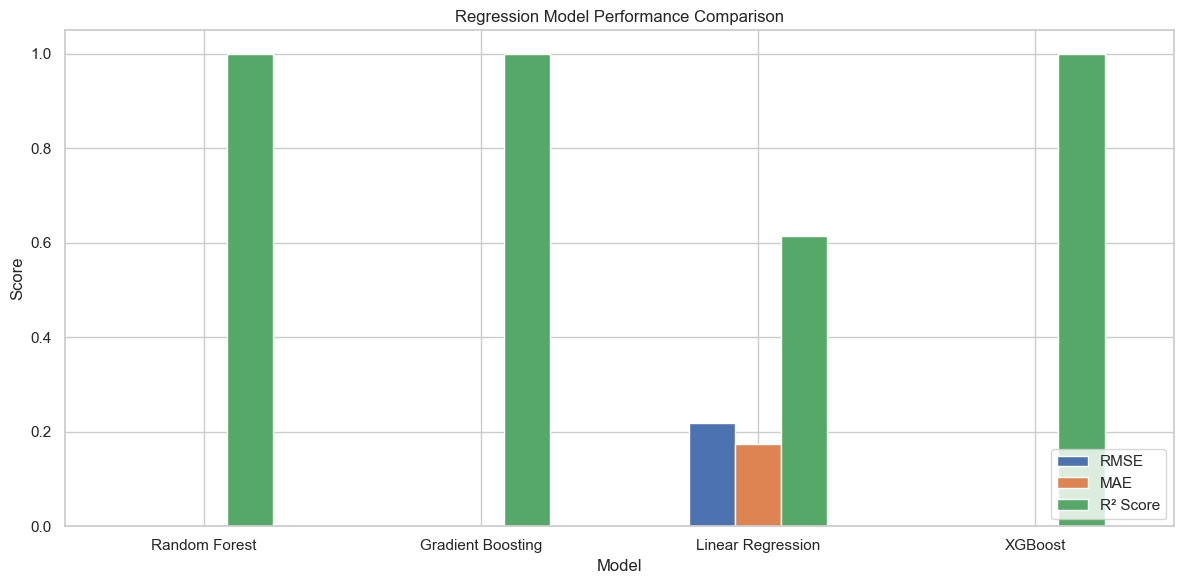

In [ ]:
# Create comparison plot
plt.figure(figsize=(12, 6))
reg_results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Regression Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('regression_comparison.png')

In [ ]:
# Create an interactive plot using Plotly
fig = go.Figure()

for metric in reg_results_df.columns:
    fig.add_trace(go.Bar(
        x=reg_results_df.index,
        y=reg_results_df[metric],
        name=metric
    ))

fig.update_layout(
    title='Regression Model Performance Comparison',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group'
)
fig.write_html('regression_comparison.html')

print("\nMachine learning modeling completed successfully!")


Machine learning modeling completed successfully!


## data prediction and analysis
### Predicting employee attrition

In [ ]:
# Define features and targets
performance_target = 'PerformanceRating'
attrition_target = 'AttritionBinary'

In [ ]:
# Drop any unnecessary columns and Employee Number (ID column)
X = df.drop(['Attrition', attrition_target, performance_target, 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
y_performance = df[performance_target]
y_attrition = df[attrition_target]

In [ ]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Split the data
X_train, X_test, y_attrition_train, y_attrition_test, y_performance_train, y_performance_test = train_test_split(
    X, y_attrition, y_performance, test_size=0.2, random_state=42)

### best model for attrition prediction

In [ ]:
# Based on previous evaluation, XGBoost had the best performance for attrition prediction

print("\n===== BEST MODEL: XGBoost Classifier for Attrition Prediction =====")
best_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])
best_clf.fit(X_train, y_attrition_train)
y_pred_best = best_clf.predict(X_test)
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]  # Probability of attrition
# Final evaluation of best classifier
accuracy = accuracy_score(y_attrition_test, y_pred_best)
precision = precision_score(y_attrition_test, y_pred_best)
recall = recall_score(y_attrition_test, y_pred_best)
f1 = f1_score(y_attrition_test, y_pred_best)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


===== BEST MODEL: XGBoost Classifier for Attrition Prediction =====


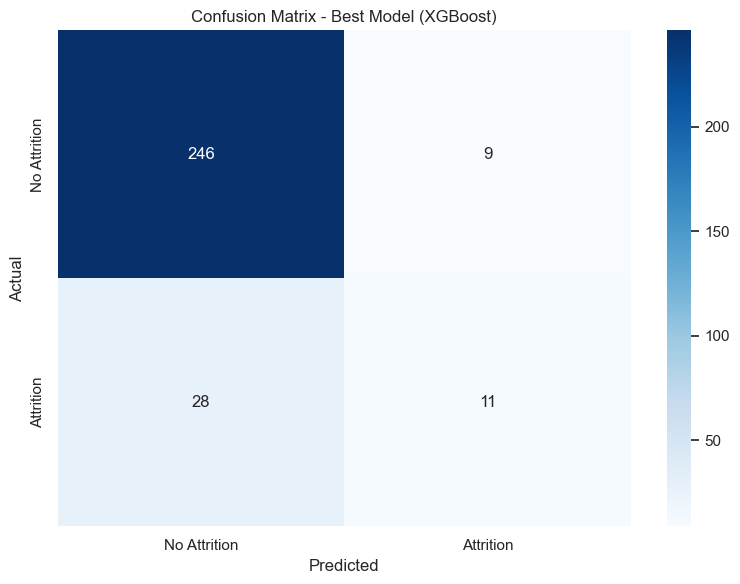

In [ ]:
# Confusion matrix for the best model
cm = confusion_matrix(y_attrition_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix - Best Model (XGBoost)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('best_model_conf_matrix.png')

In [ ]:
# Feature importance for the best classifier
feature_names = numeric_features + list(best_clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

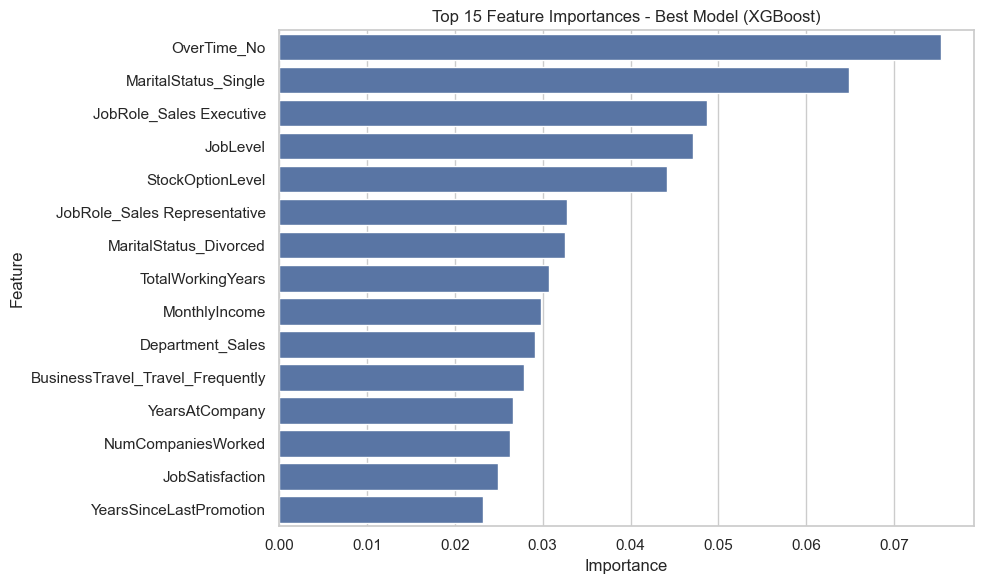

In [ ]:
# For XGBoost, we can get feature importance
importances = best_clf.named_steps['classifier'].feature_importances_
feature_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Top 15 Feature Importances - Best Model (XGBoost)')
plt.tight_layout()
plt.savefig('best_model_feature_importance.png')

In [ ]:
# Create interactive feature importance plot
fig = px.bar(feature_imp, x='Importance', y='Feature', orientation='h',
             title='Top 15 Feature Importances - Best Model (XGBoost)')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.write_html('best_model_feature_importance.html')

### best model for performance prediction

In [ ]:
# Based on previous evaluation, Random Forest had the best performance for performance rating prediction

print("\n===== BEST MODEL: Random Forest Regressor for Performance Prediction =====")
best_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
best_reg.fit(X_train, y_performance_train)
y_pred_reg_best = best_reg.predict(X_test)
# Final evaluation of best regressor
rmse = np.sqrt(mean_squared_error(y_performance_test, y_pred_reg_best))
mae = mean_absolute_error(y_performance_test, y_pred_reg_best)
r2 = r2_score(y_performance_test, y_pred_reg_best)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


===== BEST MODEL: Random Forest Regressor for Performance Prediction =====


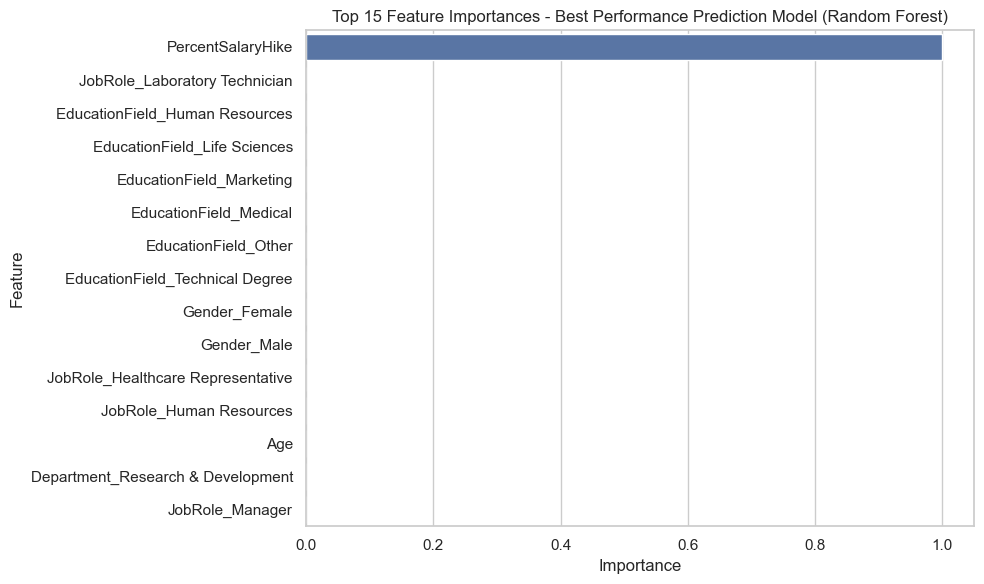

In [ ]:
# Feature importance for the best regressor
reg_importances = best_reg.named_steps['regressor'].feature_importances_
reg_feature_imp = pd.DataFrame({'Feature': feature_names, 'Importance': reg_importances})
reg_feature_imp = reg_feature_imp.sort_values('Importance', ascending=False).head(15)

# Plot feature importance for regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=reg_feature_imp)
plt.title('Top 15 Feature Importances - Best Performance Prediction Model (Random Forest)')
plt.tight_layout()
plt.savefig('best_reg_model_feature_importance.png')

### make prediction on a new data input

In [ ]:
# function to make predictions for new employees
def predict_employee_outcomes(employee_data):
    """
    Predict attrition risk and performance rating for new employee data

    Parameters:
    employee_data (pd.DataFrame): DataFrame containing employee features

    Returns:
    pd.DataFrame: Original data with predictions added
    """
    # Make a copy to avoid modifying the original
    results = employee_data.copy()

    # Prepare the data (drop any target columns if present)
    X_new = results.drop(['Attrition', 'AttritionBinary', 'PerformanceRating',
                         'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'],
                         axis=1, errors='ignore')

    # Predict attrition probability
    attrition_proba = best_clf.predict_proba(X_new)[:, 1]
    results['AttritionRisk'] = attrition_proba
    results['AttritionPrediction'] = best_clf.predict(X_new)

    # Predict performance rating
    results['PredictedPerformance'] = best_reg.predict(X_new)

    return results

In [ ]:
# Let's create a sample of employees to predict outcomes for demonstration
# We'll use the test set for this example
sample_employees = X_test.copy().head(10)
sample_employees['Attrition'] = ['No' if x == 0 else 'Yes' for x in y_attrition_test.head(10)]
sample_employees['PerformanceRating'] = y_performance_test.head(10).values

In [ ]:
# Make predictions for these employees
prediction_results = predict_employee_outcomes(sample_employees)

In [ ]:
# Display key prediction results
print("\n===== Sample Employee Predictions =====")
prediction_display = pd.DataFrame({
    'Department': prediction_results['Department'],
    'JobRole': prediction_results['JobRole'],
    'Age': prediction_results['Age'],
    'YearsAtCompany': prediction_results['YearsAtCompany'],
    'MonthlyIncome': prediction_results['MonthlyIncome'],
    'JobSatisfaction': prediction_results['JobSatisfaction'],
    'WorkLifeBalance': prediction_results['WorkLifeBalance'],
    'Actual Attrition': prediction_results['Attrition'],
    'Attrition Risk (%)': prediction_results['AttritionRisk'] * 100,
    'Actual Performance': prediction_results['PerformanceRating'],
    'Predicted Performance': prediction_results['PredictedPerformance'].round(2)
})
print(prediction_display)


===== Sample Employee Predictions =====
                  Department                 JobRole  Age  YearsAtCompany  \
1041                   Sales         Sales Executive   28               5   
184   Research & Development  Manufacturing Director   53               4   
1222         Human Resources         Human Resources   24               1   
67    Research & Development      Research Scientist   45               1   
220   Research & Development   Laboratory Technician   36              13   
494                    Sales    Sales Representative   34               8   
430   Research & Development   Laboratory Technician   35               5   
240   Research & Development   Laboratory Technician   39               3   
218                    Sales         Sales Executive   45              19   
49    Research & Development   Laboratory Technician   35               1   

      MonthlyIncome  JobSatisfaction  WorkLifeBalance Actual Attrition  \
1041           8463                1 

### visualization of the prediction

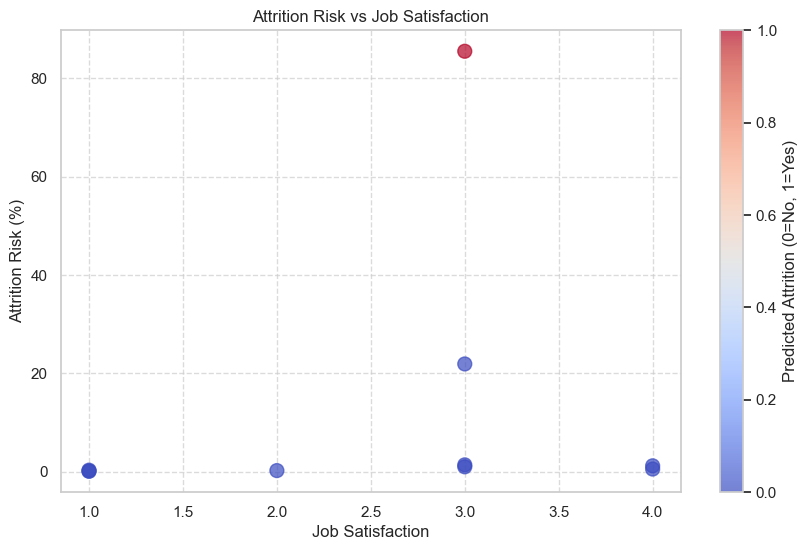

In [ ]:
# 1. Attrition Risk vs Job Satisfaction
plt.figure(figsize=(10, 6))
scatter = plt.scatter(prediction_results['JobSatisfaction'],
                     prediction_results['AttritionRisk'] * 100,
                     c=prediction_results['AttritionPrediction'],
                     cmap='coolwarm',
                     alpha=0.7,
                     s=100)
plt.colorbar(scatter, label='Predicted Attrition (0=No, 1=Yes)')
plt.title('Attrition Risk vs Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Risk (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('attrition_vs_satisfaction.png')

In [ ]:
# 2. Interactive 3D plot of Attrition Risk vs Satisfaction and Income using Plotly
fig = px.scatter_3d(prediction_results,
                   x='JobSatisfaction',
                   y='MonthlyIncome',
                   z='AttritionRisk',
                   color='AttritionPrediction',
                   hover_data=['Department', 'JobRole', 'Age', 'YearsAtCompany'],
                   color_continuous_scale='Viridis',
                   title='3D Analysis of Attrition Risk')
fig.update_layout(scene=dict(
    xaxis_title='Job Satisfaction',
    yaxis_title='Monthly Income',
    zaxis_title='Attrition Risk'))
fig.write_html('3d_attrition_analysis.html')

In [ ]:
# 3. Interactive visualization of Performance Prediction vs Job Satisfaction
fig = px.scatter(prediction_results,
                x='JobSatisfaction',
                y='PredictedPerformance',
                color='AttritionRisk',
                size='YearsAtCompany',
                hover_data=['Department', 'JobRole', 'WorkLifeBalance'],
                color_continuous_scale='Viridis',
                title='Predicted Performance vs Job Satisfaction')
fig.update_layout(xaxis_title='Job Satisfaction',
                 yaxis_title='Predicted Performance Rating')
fig.write_html('performance_vs_satisfaction.html')

# IDENTIFY KEY INFLUENCING FACTORS

In [ ]:
print("\n===== Key Factors Influencing Employee Outcomes =====")

# 1. Key factors for attrition
print("\nTop 5 factors influencing attrition:")
for idx, row in feature_imp.head(5).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")


===== Key Factors Influencing Employee Outcomes =====

Top 5 factors influencing attrition:
- OverTime_No: 0.0753
- MaritalStatus_Single: 0.0648
- JobRole_Sales Executive: 0.0487
- JobLevel: 0.0471
- StockOptionLevel: 0.0441


In [ ]:
# 2. Key factors for performance
print("\nTop 5 factors influencing performance:")
for idx, row in reg_feature_imp.head(5).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")


Top 5 factors influencing performance:
- PercentSalaryHike: 1.0000
- JobRole_Laboratory Technician: 0.0000
- EducationField_Human Resources: 0.0000
- EducationField_Life Sciences: 0.0000
- EducationField_Marketing: 0.0000


In [ ]:
# 3. Department-wise attrition risk analysis
dept_attrition = df.groupby('Department')['AttritionBinary'].mean() * 100
dept_attrition = dept_attrition.reset_index().rename(columns={'AttritionBinary': 'Attrition Risk (%)'})
dept_attrition = dept_attrition.sort_values('Attrition Risk (%)', ascending=False)

print("\nDepartment-wise Attrition Risk:")
print(dept_attrition)


Department-wise Attrition Risk:
               Department  Attrition Risk (%)
2                   Sales           20.627803
0         Human Resources           19.047619
1  Research & Development           13.839750


In [ ]:
# 4. JobRole-wise attrition risk analysis
role_attrition = df.groupby('JobRole')['AttritionBinary'].mean() * 100
role_attrition = role_attrition.reset_index().rename(columns={'AttritionBinary': 'Attrition Risk (%)'})
role_attrition = role_attrition.sort_values('Attrition Risk (%)', ascending=False)

print("\nJob Role-wise Attrition Risk:")
print(role_attrition)


Job Role-wise Attrition Risk:
                     JobRole  Attrition Risk (%)
8       Sales Representative           39.759036
2      Laboratory Technician           23.938224
1            Human Resources           23.076923
7            Sales Executive           17.484663
6         Research Scientist           16.095890
4     Manufacturing Director            6.896552
0  Healthcare Representative            6.870229
3                    Manager            4.901961
5          Research Director            2.500000


In [ ]:
# Create interactive bar charts for departments and roles
fig = px.bar(dept_attrition, x='Department', y='Attrition Risk (%)',
            title='Attrition Risk by Department',
            color='Attrition Risk (%)',
            color_continuous_scale='Viridis')
fig.write_html('dept_attrition_risk.html')

fig = px.bar(role_attrition, x='JobRole', y='Attrition Risk (%)',
            title='Attrition Risk by Job Role',
            color='Attrition Risk (%)',
            color_continuous_scale='Viridis')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.write_html('role_attrition_risk.html')

print("\nPrediction analysis completed successfully!")


Prediction analysis completed successfully!
